# СЕ. Лабораторная работа №2.

![img](https://raw.githubusercontent.com/Python3xsssss/SE-Laba-2/main/Img1.png)

Эта схема состоит из колебательного контура (конденсатор $C$, резистор $R$ и источник постоянного тока с ЭДС $E = const$ ) и неоновой лампы, включенной параллельно конденсатору. Если неоновая лампа пропускает ток, то газ, наполняющий ее, находится
в ионизированном состоянии и светится – лампа горит; если она не пропускает ток, то не горит. Неоновую лампу можно считать
нелинейным сопротивлением, у которого зависимость между током (силой тока) $i$ и напряжением $u$ (вольт-амперная характеристика) выражается функцией $i = f(u)$. 

In [21]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import math

Зададим функцию $i = f(u)$ программно и отобразим ее график. 

In [22]:
ug, ig, uz = 5, 6, 10

In [23]:
def f(u):
    global kappa
    if kappa == 0:
        if (u < uz):
            return 0
        else:
            kappa = 1
            return math.sqrt(u - ug) + ig
    else:
        if (u > ug):
            return math.sqrt(u - ug) + ig
        else:
            kappa = 0
            return 0

In [24]:
h = 0.01
u_space_0 = np.linspace(0, uz - h, num=int(uz/h))
u_space_1 = np.linspace(ug + h, uz + 5, num=int((uz + 5 - ug)/h))
u_space = np.linspace(0, uz + 5, num=int((uz + 5)/h))

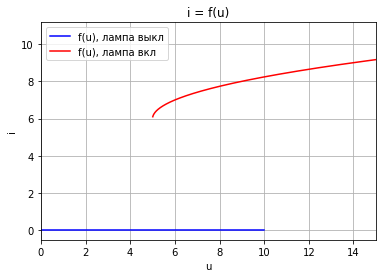

In [25]:
kappa = 0
plt.plot(u_space_0, [f(u) for u in u_space_0], color="blue", label="f(u), лампа выкл")
kappa = 1
plt.plot(u_space_1, [f(u) for u in u_space_1], color="red", label="f(u), лампа вкл")

plt.grid()
plt.legend(loc="best")
plt.xlim(left = 0, right = uz + 5)
plt.xlabel("u")
plt.ylim(bottom = -0.5, top = f(uz + 5) + 2)
plt.ylabel("i")
plt.title("i = f(u)")
plt.show()

Особенностью функции $i = f(u)$ является ее гистерезисный (запаздывающий) характер: если лампа не горела ($i = 0$), то при увеличении напряжения $u$ она загорается (сила тока меняется скачком от нуля до некоторого положительного значения) только при переходе $u$ через некоторое пороговое значение $u_з$ (напряжение зажигания); если же лампа горела, то при уменьшении $u$ она погаснет (ток падает скачком до нуля) только при переходе $u$ через другое пороговое значение $u_г$ (напряжение гашения), где $u_г < u_з$. Поэтому на интервале $u_г < u < u_з$ функция $i = f(u)$ двузначная, и ее значение зависит не только от текущего значения $u$, но и от предыстории изменения $u$. 

В данном случае $u_г = 5$, $u_з = 10$.

Для полного описания динамики системы нужно, кроме переменной $u$, ввести логическую переменную («флажок») $æ$ (каппа) (индикатор горения лампы): если лампа горит, то $æ = 1$, а если не горит, то $æ = 0$. При переходе $u$ в сторону увеличения через значение $u = u_з$ значение $æ$ скачком изменяется с $0$ на $1$, а при переходе $u$ в сторону уменьшения через значение $u = u_г$ – с $1$ на $0$. Состоянием (фазовыми переменными) динамической системы является вектор $(u,æ)$.

Функцию $f(u)$ теперь можно записать таким образом: 
$$f(u)=  \left\{\begin{array} (\sqrt{(u - u_г)} + i_г, æ=1, u > u_г\\
0, æ=0, 0 < u < u_з \end{array}\right. $$

Применяя законы Кирхгофа для токов и учитывая, что $i =\dot q$,где $q$ – заряд на конденсаторе, имеем систему уравнений:

$$i_1 = i + \dot q, \; R\cdot i_1 + u =  E, \; i = f(u)$$ 

Исключая из этой системы $i_1$, $i$ и $q$, получим уравнение для $u$:
$$ \dot u = \frac{1}{RC}\left[E-u-R\cdot f(u)\right]$$

Тогда условие состояния равновесия:
$$ f(u) = \frac{E - u}{R}$$

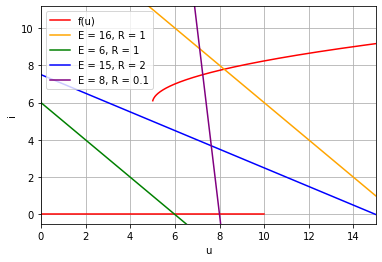

In [26]:
kappa = 0
plt.plot(u_space_0, [f(u) for u in u_space_0], color="red")
kappa = 1
plt.plot(u_space_1, [f(u) for u in u_space_1], color="red", label="f(u)")

Es_and_Rs = []

E, R = 16, 1
plt.plot(u_space, [(E - u)/R for u in u_space], color = "orange", label=f"E = {E}, R = {R}")
Es_and_Rs.append([E, R])

E, R = 6, 1
plt.plot(u_space, [(E - u)/R for u in u_space], color = "green", label=f"E = {E}, R = {R}")
Es_and_Rs.append([E, R])

E, R = 15, 2
plt.plot(u_space, [(E - u)/R for u in u_space], color = "blue", label=f"E = {E}, R = {R}")
Es_and_Rs.append([E, R])

E, R = 8, 0.1
plt.plot(u_space, [(E - u)/R for u in u_space], color = "purple", label=f"E = {E}, R = {R}")
Es_and_Rs.append([E, R])

plt.grid()
plt.legend(loc="best")
plt.xlim(left = 0, right = uz + 5)
plt.xlabel("u")
plt.ylim(bottom = -0.5, top = f(uz + 5) + 2)
plt.ylabel("i")
plt.show()

В зависимости от значения параметров E, R и C может быть 4 варианта фазового портрета данной динамической системы:
1. При любых начальных условиях лампа обязательно *загорится и далее будет гореть*. В данном случае единственное глобально устойчивое состояние равновесия - при $æ = 1$  (в точке пересечения $\color{orange}{оранжевой\,прямой}$ с графиком $f(u)$).
2. При любых начальных условиях лампа обязательно *погаснет и больше не загорится*. В данном случае единственное глобально устойчивое состояние равновесия - при $æ = 0$ (в точке пересечения $\color{green}{зеленой\,прямой}$ с графиком $f(u)$).
3. При любых начальных условиях лампа будет *мигать* (глобально устойчивые *автоколебания*). Состояний равновесия нет ($\color{blue}{синяя\,прямая}$).
4. Существуют два устойчивых состояния равновесия, в одном из которых лампа горит, а в другом – не горит (в точках пересечения $\color{purple}{фиолетовой\,прямой}$ с графиком $f(u)$). Траектория системы приходит в одно из этих состояний равновесия в зависимости от начальных условий. Если под действием некоторых флуктуаций (случайных электрических импульсов) начальное напряжение на лампе изменится скачком, то система может перейти по фазовой траектории в другое состояние равновесия. Такое поведение системы аналогично поведению электрической схемы, называемой **триггером**. Поэтому данный сценарий поведения системы можно назвать **триггерным режимом**.

Зададим функции $\dot u$, **метода Эйлера** и **построения фазового портрета** программно:

In [27]:
def dudt(u,  E=1, R=1, C=1):
    fu = f(u)
    du = (E - u - R * fu) / (R * C)
    return du

def euler(u0, h=0.01, E=1, R=1, C=1):
    du = dudt(u0, E=E, R=R, C=C)
    return u0 + h * du

def phase_portrait(u0, h, kappa=kappa, E=1, R=1, C=1):
    t_space = np.linspace(0, 30, num=int(30/h))
    u_values = []
    for t in t_space:
        u = euler(u0, h=h, E=E, R=R, C=C)
        u_values.append(u)
        u0 = u
        
    plt.plot(t_space, u_values)
    plt.grid()
    plt.xlim(left = 0, right = uz + 5)
    plt.xlabel("t")
    plt.ylabel("u")
    plt.show()

Построим фазовые портреты (по 4 на каждый возможный качественный вариант):

1) Параметры: E = 16, R = 1, C = 1

  1. Начальные условия: u0 = 0, лампа выключена


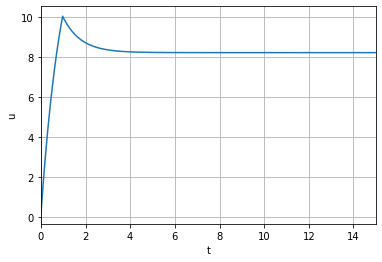

      Итог: Лампа включена, состояние равновесия.


  2. Начальные условия: u0 = 9.99, лампа выключена


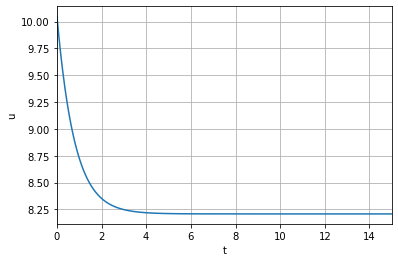

      Итог: Лампа включена, состояние равновесия.


  3. Начальные условия: u0 = 15, лампа включена


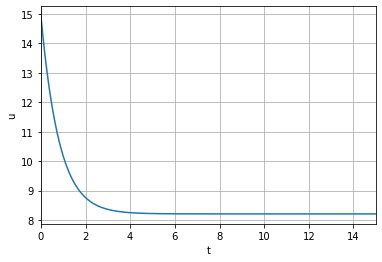

      Итог: Лампа включена, состояние равновесия.


  4. Начальные условия: u0 = 5.01, лампа включена


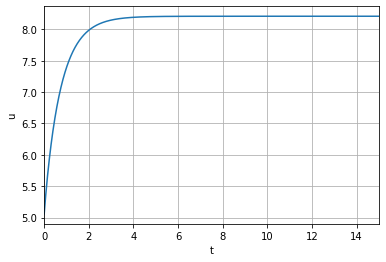

      Итог: Лампа включена, состояние равновесия.


2) Параметры: E = 6, R = 1, C = 1

  1. Начальные условия: u0 = 0, лампа выключена


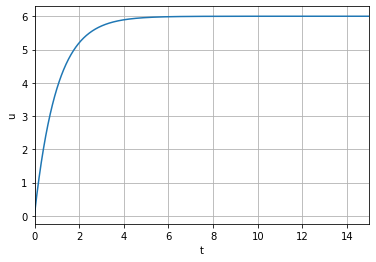

      Итог: Лампа выключена, состояние равновесия.


  2. Начальные условия: u0 = 9.99, лампа выключена


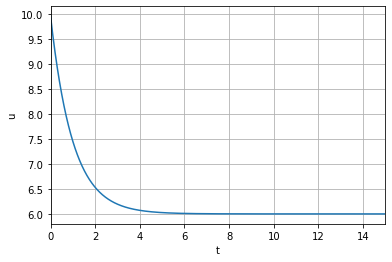

      Итог: Лампа выключена, состояние равновесия.


  3. Начальные условия: u0 = 15, лампа включена


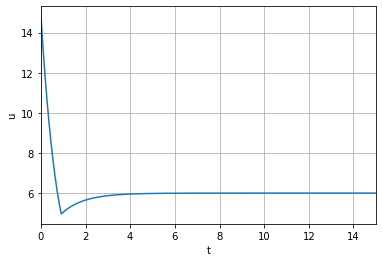

      Итог: Лампа выключена, состояние равновесия.


  4. Начальные условия: u0 = 5.01, лампа включена


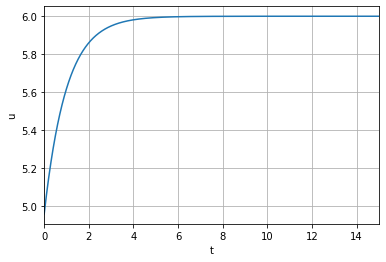

      Итог: Лампа выключена, состояние равновесия.


3) Параметры: E = 15, R = 2, C = 1

  1. Начальные условия: u0 = 0, лампа выключена


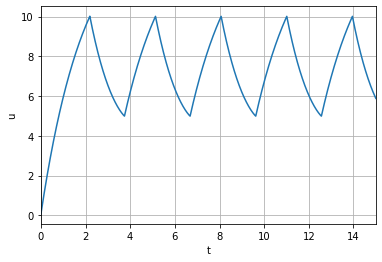

      Итог: Лампа мигает, нет равновесия.


  2. Начальные условия: u0 = 9.99, лампа выключена


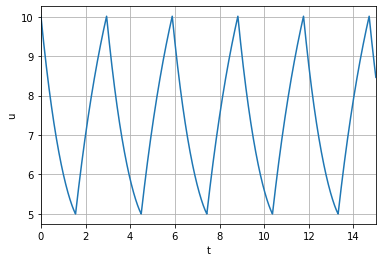

      Итог: Лампа мигает, нет равновесия.


  3. Начальные условия: u0 = 15, лампа включена


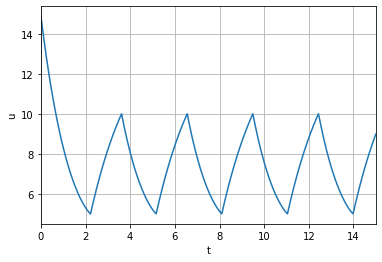

      Итог: Лампа мигает, нет равновесия.


  4. Начальные условия: u0 = 5.01, лампа включена


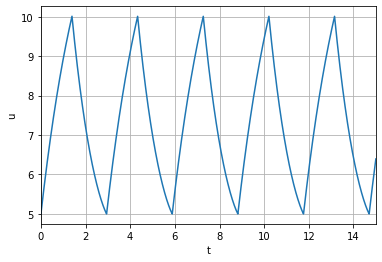

      Итог: Лампа мигает, нет равновесия.


4) Параметры: E = 8, R = 0.1, C = 1

  1. Начальные условия: u0 = 0, лампа выключена


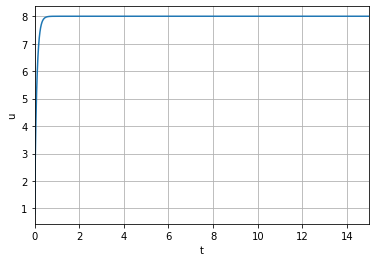

      Итог: Лампа выключена, состояние равновесия.


  2. Начальные условия: u0 = 9.99, лампа выключена


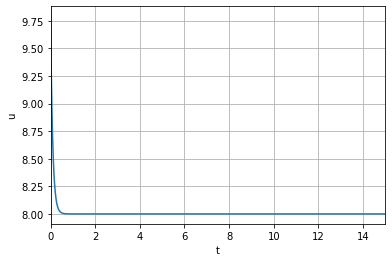

      Итог: Лампа выключена, состояние равновесия.


  3. Начальные условия: u0 = 15, лампа включена


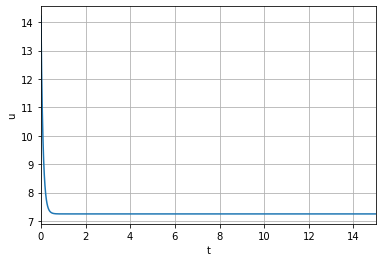

      Итог: Лампа включена, состояние равновесия.


  4. Начальные условия: u0 = 5.01, лампа включена


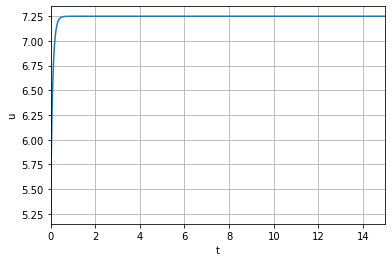

      Итог: Лампа включена, состояние равновесия.




In [31]:
h = 0.01
lamp = ["выключена", "включена"]
i = 1
u0s_and_kappas = [[0, 0], [uz - h, 0], [uz + 5, 1], [ug + h, 1]]
for E, R in Es_and_Rs:
    print("{}) Параметры: E = {}, R = {}, C = {}\n".format(i, E, R, 1))
    j = 1
    for u0, kappa in u0s_and_kappas:
        print("  {}. Начальные условия: u0 = {}, лампа {}".format(j, u0, lamp[kappa]))
        phase_portrait(u0, h, kappa=kappa, E=E, R=R, C=1)
        if [E, R] == Es_and_Rs[2]:
            print("      Итог: Лампа мигает, нет равновесия.\n\n")
        else:
            print("      Итог: Лампа {}, состояние равновесия.\n\n".format(lamp[kappa]))
        j+=1
    i+=1